In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from netCDF4 import Dataset
import xarray as xr

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
%matplotlib inline
#%matplotlib qt

In [4]:
#path = "/home/wanderson/Documentos/ncl/"
#dataset = Dataset(path +'MAY2015_24Z_12Z_NCEP.nc')
#print(dataset)

In [5]:
path = "/home/wanderson/Documentos/ncl/"

In [6]:
DS_NCEP = xr.open_dataset(path +'MAY2015_24Z_12Z_NCEP.nc')

DS_SMG_V200 = xr.open_dataset(path +'MAY2015_24Z_12Z_SMG.nc')

DS_SMG_V210 = xr.open_dataset(path +'MAY2015_24Z_12Z_SMG_versao210.nc')

GFS = xr.open_dataset(path +'prev.2015.mar.24h_seldate.nc')

GPM = xr.open_dataset(path +'GPM_REC_ACUM_24h_grib2.nc')

In [7]:
DS_NCEP

<xarray.Dataset>
Dimensions:  (lat: 450, lev: 33, lon: 900, time: 25)
Coordinates:
  * lon      (lon) float64 0.0 0.4 0.8 1.2 1.6 ... 358.0 358.4 358.8 359.2 359.6
  * lat      (lat) float64 -89.69 -89.3 -88.9 -88.5 ... 88.5 88.9 89.3 89.69
  * lev      (lev) float64 1e+03 985.0 975.0 960.0 950.0 ... 30.0 20.0 10.0 3.0
  * time     (time) datetime64[ns] 2015-05-01T12:00:00 ... 2015-05-25T12:00:00
Data variables:
    topo     (time, lat, lon) float32 ...
    lsmk     (time, lat, lon) float32 ...
    pslc     (time, lat, lon) float32 ...
    psnm     (time, lat, lon) float32 ...
    u10t     (time, lat, lon) float32 ...
    v10t     (time, lat, lon) float32 ...
    prec     (time, lat, lon) float32 ...
    prcv     (time, lat, lon) float32 ...
    cssf     (time, lat, lon) float32 ...
    clsf     (time, lat, lon) float32 ...
    usst     (time, lat, lon) float32 ...
    vsst     (time, lat, lon) float32 ...
    cbnv     (time, lat, lon) float32 ...
    ocis     (time, lat, lon) float32 

In [8]:
#DS_SMG_V200

In [9]:
#DS_SMG_V210

In [10]:
#GFS

In [11]:
#GPM

In [12]:
prec1d_DS_NCEP = DS_NCEP.prec.isel(lat=80,lon=80)

In [13]:
prec1d_DS_SMG_V200 = DS_SMG_V200.prec.isel(lat=80,lon=80)

In [14]:
prec1d_DS_SMG_V210 = DS_SMG_V210.prec.isel(lat=80,lon=80)

In [15]:
prec1dGFS = GFS.APCP_surface.isel(latitude=80,longitude=80)

In [16]:
prec1dGPM = GPM.PREC_surface.isel(latitude=80,longitude=80)

In [17]:
from matplotlib import pylab

sns.set(style="whitegrid", color_codes=True)

/home/wanderson/anaconda3/envs/jupyterlab_env/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


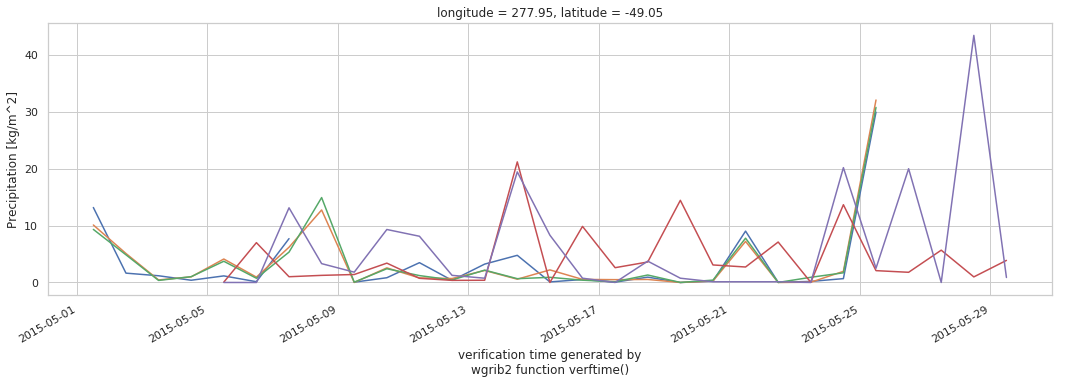

In [18]:
pylab.rcParams['figure.figsize'] = (18,5)
prec1d_DS_NCEP.plot()
prec1d_DS_SMG_V200.plot()
prec1d_DS_SMG_V210.plot()
prec1dGFS.plot()
prec1dGPM.plot()

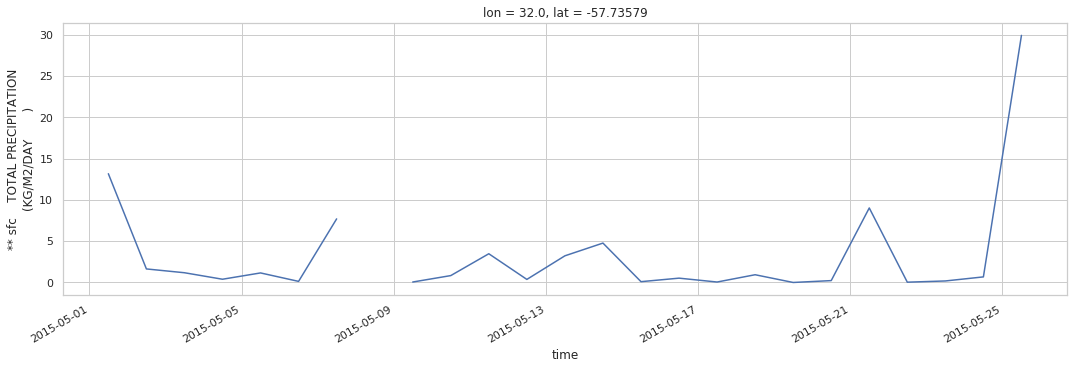

In [19]:
prec1d_DS_NCEP = DS_NCEP.prec.isel(lat=80,lon=80)
#prec1d_DS_NCEP.mean()
prec1d_DS_NCEP.plot()

# TESTE

Criando o primeiro mapa utilizando o Basemap

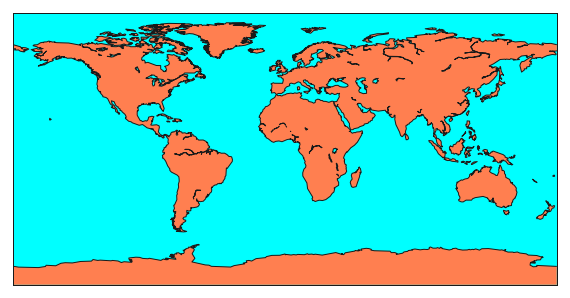

In [20]:
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral', lake_color='aqua')
map.drawcoastlines()


In [21]:
lon = DS_NCEP.variables['lon'][:]
lat = DS_NCEP.variables['lat'][:]

lon, lat = np.meshgrid(lon,lat)

In [22]:
def plt_map_test(data):
    map = Basemap(projection='cyl')
    x, y = map(lon,lat)
    map.contour(x,y,data)
    map.drawmapboundary(fill_color='aqua')
    map.fillcontinents(color='coral', lake_color='aqua')
    #map.drawlsmask(land_color='coral', ocean_color='aqua', lakes=True)
    map.drawcoastlines()


In [81]:
#data = DS_NCEP.prec.mean(dim='time')
#plt_map_test(data)

In [24]:
def plt_map(data):
    #m = Basemap(projection="mill", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=0, urcrnrlon=360,lat_ts=20, resolution='c')
    m = Basemap(projection="mill", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=0, urcrnrlon=360,lat_ts=20, resolution='c')
    x, y = m(lon,lat)
    plt.figure(figsize=(13,15))
    m.drawcoastlines()
    #m.drawparallels(np.arange(-80.,80.,20.))
    #m.drawmeridians(np.arange(-180.,181.,20.))
    ##m.drawmapboundary(fill_color='white')
    #m.drawmapboundary(fill_color='aqua')
    m.fillcontinents(color='coral')
    #m.contour(x,y,data,levels=np.linspace(-25,30,56), extend='both')
    m.contour(x,y,data)
    plt.colorbar(orientation='horizontal', pad=0.05)
    plt.show()

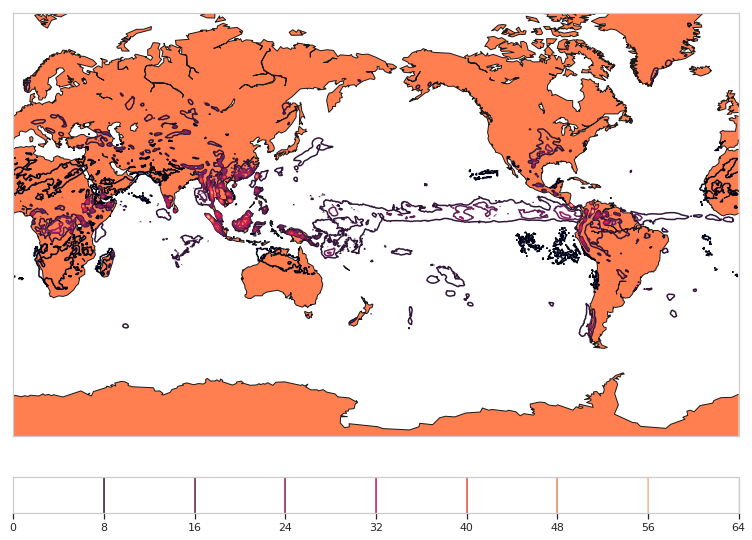

In [25]:
plt_map(data)
#data = prec.mean('time')
#data = DS_NCEP.['prec']['80']['80']

#data = DS_NCEP.prec.mean(dim='time')

In [26]:
#pylab.rcParams['figure.figsize'] = (18,18)
#plt_map(prec[0,:,:])
#plt_map(data)

<!DOCTYPE html>
<html>
<head>
</head>
    <body>
        <h6>ÁREAS</h6>
         <div>
     <table>
      <thead>
       <th>área</th>   
       <th>latitude inicial</th>
       <th>latitude final</th>
       <th>longitude inicial</th>
       <th>longitude final</th>
      </thead>
      <tbody>
       <td>South American</td>   
       <td>-36</td>
       <td>0</td>
       <td>280</td>
       <td>325</td>   
      </tbody>
      <tbody>
       <td>La Plata</td>
       <td>-36</td>
       <td>-24</td>
       <td>295</td>
       <td>315</td>
      </tbody>
      <tbody>
       <td>Southeast</td>
       <td>-24</td>
       <td>-12</td>
       <td>310</td>
       <td>325</td>
      </tbody>
      <tbody>
       <td>Central West</td>
       <td>-24</td>
       <td>-12</td>
       <td>295</td>
       <td>310</td> 
      </tbody>
      <tbody>
       <td>Northeast</td>
       <td>-12</td>
       <td>0</td>
       <td>310</td>
       <td>325</td> 
      </tbody>
      <tbody>
       <td>Amazon</td>
       <td>-12</td>
       <td>0</td>
       <td>295</td>
       <td>310</td> 
      </tbody>
     </table>
    </div>
    </body>
</html>

In [27]:
#lon = DS_NCEP.variables['lon'][280:325]
#lat = DS_NCEP.variables['lat'][-36:0]

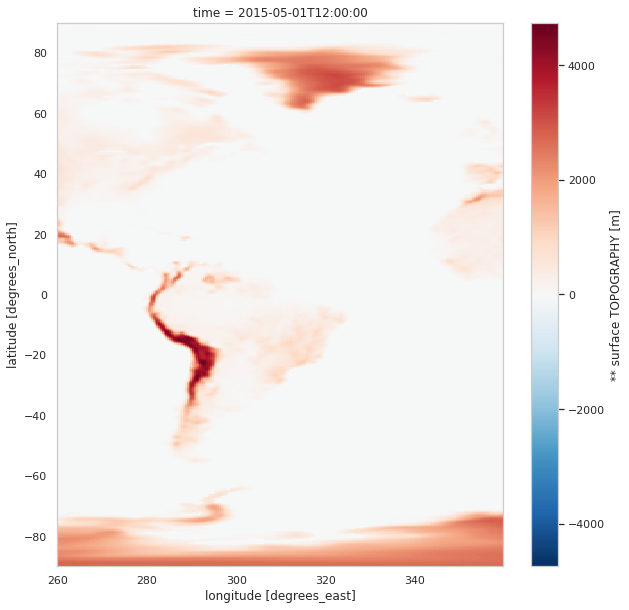

In [28]:
pylab.rcParams['figure.figsize'] = (10,10)
#DS_NCEP.prec.mean(dim='time').plot()
#DS_NCEP.prec.mean(dim=['lat','lon']).plot()
#vervar =  DS_NCEP.prec.sel(lat=slice(60,50),lon=slice(200,270))
#vervar =  DS_NCEP.sel(lat=slice(-36,50),lon=slice(200,270),time='2015-05-01T12:00:00')
DS_NCEP.topo.sel(lat=slice(-90,90),lon=slice(260,360),time='2015-05-01T12:00:00').plot()
#prec2 = DS_NCEP.prec.sel(lat=slice(90,170),lon=slice(450,900))
#vervar.prec
#prec2
#plt_map(prec2)
#plt_map(vervar)

In [29]:
prec1d_DS_NCEP = DS_NCEP.prec.isel(lat=80,lon=80)
prec1d_DS_NCEP

<xarray.DataArray 'prec' (time: 25)>
array([13.179688,  1.640625,  1.179688,  0.392578,  1.15625 ,  0.132812,
        7.707031,       nan,  0.054688,  0.833984,  3.480469,  0.371094,
        3.230469,  4.773438,  0.097656,  0.523438,  0.054688,  0.9375  ,
        0.      ,  0.226562,  9.029297,  0.035156,  0.183594,  0.675781,
       29.945312], dtype=float32)
Coordinates:
    lon      float64 32.0
    lat      float64 -57.74
  * time     (time) datetime64[ns] 2015-05-01T12:00:00 ... 2015-05-25T12:00:00
Attributes:
    long_name:  ** sfc    TOTAL PRECIPITATION                     (KG/M2/DAY ...
    grid_type:  gaussian

In [30]:
# The 'old way'
DS_NCEP.prec[0:24,:,:]

<xarray.DataArray 'prec' (time: 24, lat: 450, lon: 900)>
array([[[0.164062, 0.164062, ..., 0.160156, 0.164062],
        [0.222656, 0.222656, ..., 0.21875 , 0.21875 ],
        ...,
        [0.742188, 0.734375, ..., 0.746094, 0.742188],
        [0.046875, 0.046875, ..., 0.046875, 0.046875]],

       [[0.007812, 0.007812, ..., 0.007812, 0.007812],
        [0.011719, 0.011719, ..., 0.011719, 0.011719],
        ...,
        [0.714844, 0.714844, ..., 0.695312, 0.703125],
        [0.089844, 0.089844, ..., 0.085938, 0.085938]],

       ...,

       [[0.005859, 0.005859, ..., 0.005859, 0.005859],
        [0.017578, 0.017578, ..., 0.017578, 0.017578],
        ...,
        [0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ]],

       [[0.015625, 0.015625, ..., 0.015625, 0.015625],
        [0.019531, 0.019531, ..., 0.019531, 0.019531],
        ...,
        [0.023438, 0.023438, ..., 0.023438, 0.023438],
        [0.      , 0.      , ..., 0.      , 0. 

In [31]:
ts =DS_NCEP.prec.mean(dim=['lon','lat'])
ts.data

/home/wanderson/anaconda3/envs/jupyterlab_env/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


array([2.4746   , 2.2953234, 2.1651242, 2.178828 , 2.3504403, 2.3138928,
       2.4814787,       nan, 2.3024664, 2.3124504, 2.3723683, 2.4190388,
       2.3394868, 2.3307838, 2.1512234, 2.3428113, 2.2531598, 2.3313384,
       2.3291078, 2.2251792, 2.129536 , 2.09756  , 2.1231906, 2.2701733,
       2.342796 ], dtype=float32)

In [32]:
ts = ts.load()
ts

<xarray.DataArray 'prec' (time: 25)>
array([2.4746  , 2.295323, 2.165124, 2.178828, 2.35044 , 2.313893, 2.481479,
            nan, 2.302466, 2.31245 , 2.372368, 2.419039, 2.339487, 2.330784,
       2.151223, 2.342811, 2.25316 , 2.331338, 2.329108, 2.225179, 2.129536,
       2.09756 , 2.123191, 2.270173, 2.342796], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2015-05-01T12:00:00 ... 2015-05-25T12:00:00

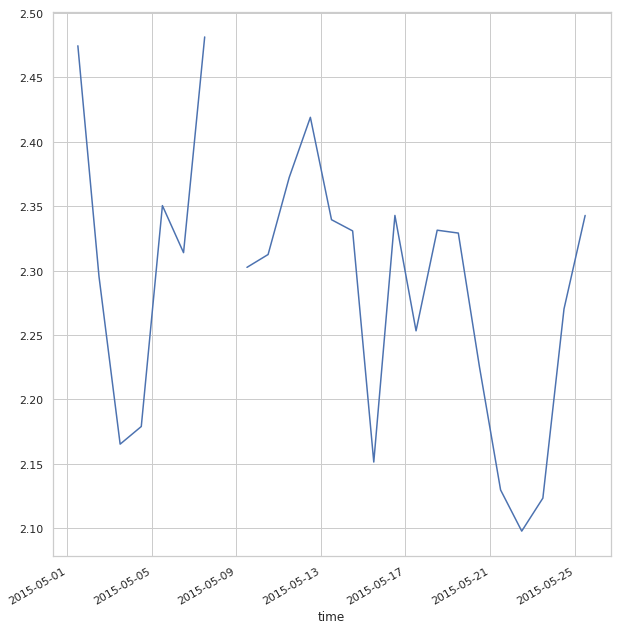

In [33]:
ts.plot();
ts.rolling(time=25, center=True).mean().plot();

In [34]:
import salem

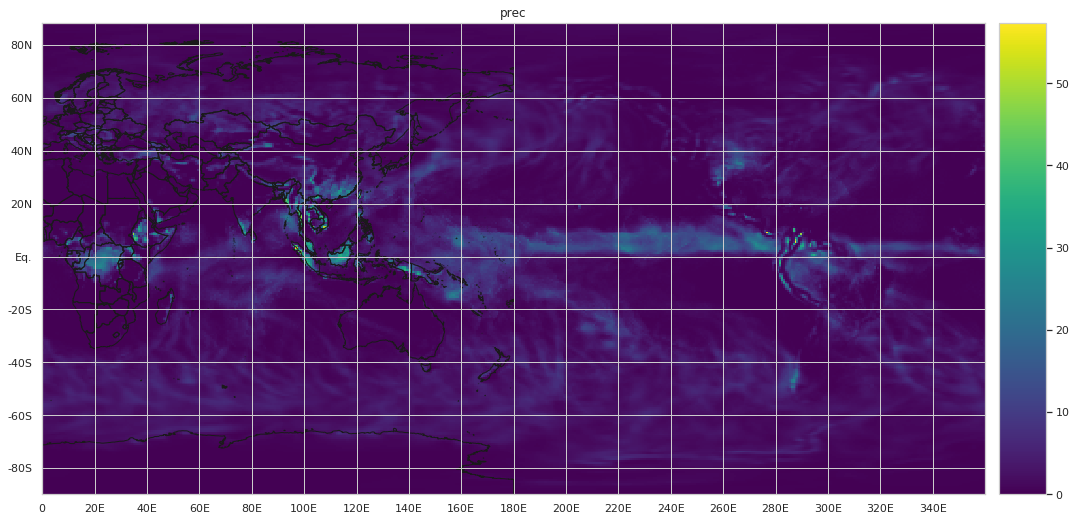

In [45]:
pylab.rcParams['figure.figsize'] = (18,18)
#pday = DS_NCEP.prec.sel(time='2015-05-05')
DS_NCEP.prec.mean(dim='time', keep_attrs=True ).salem.quick_map();
#cm = pday.salem.quick_map(cmap="Blues", vmax=100);

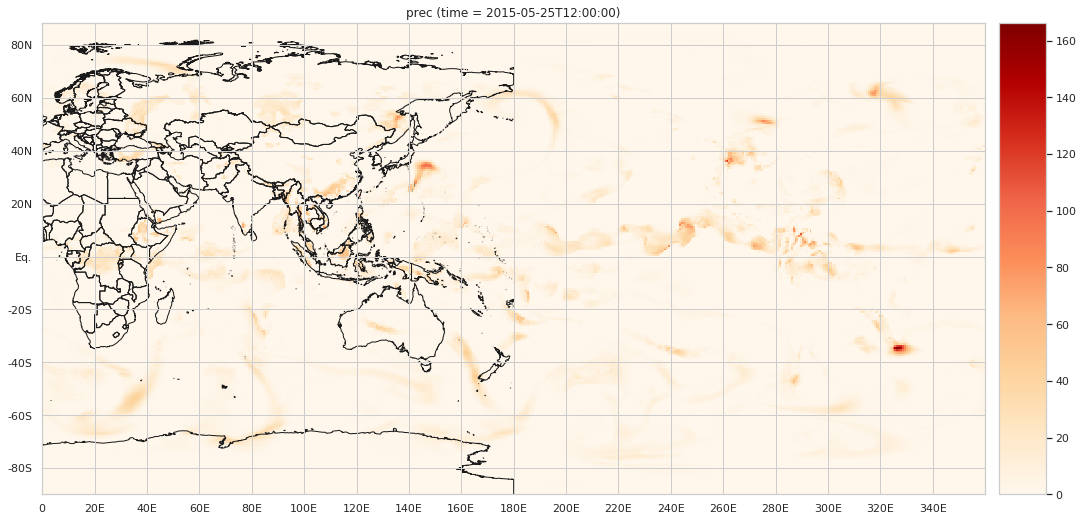

In [71]:
pylab.rcParams['figure.figsize'] = (18,18)

DS_NCEP.prec.isel(time=24).salem.quick_map(cmap='OrRd');

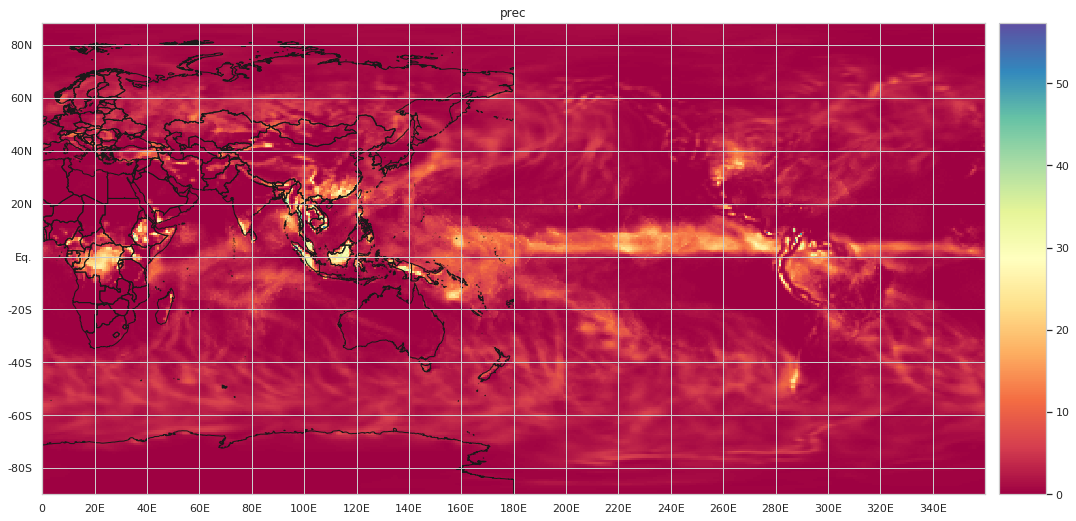

In [80]:
DS_NCEP.prec.mean(dim='time', keep_attrs=True ).salem.quick_map(cmap='Spectral');